# Quickstart

The following is a simple example of using `pocoMC` to get started. We will sample the infamous Rosenbrock distribution in 10 dimensions.

## Likelihood function and prior distribution

The first step in any analysis is to define the *prior distribution* and *likelihood function*. More precisely, for computational reasons, we require the *logarithm* of the prior probability density function $\log\pi(\theta)\equiv \log p(\theta)$ and the *logarithm* of the likelihood function $\log \mathcal{L}(\theta)\equiv\log P(d\vert \theta)$.

In [1]:
import numpy as np
from scipy.stats import uniform, norm

# import pocoMC
import pocomc as pc

# Set the random seed.
np.random.seed(0)

# Define the dimensionality of our problem.
n_dim = 10

# Define our 10-D Rosenbrock log-likelihood.
def log_likelihood(x):
    return -np.sum(10.0 * (x[:, ::2] ** 2.0 - x[:, 1::2]) ** 2.0 + (x[:, ::2] - 1.0) ** 2.0, axis=1)

# Define our normal/Gaussian prior.
prior = pc.Prior(n_dim*[norm(0.0, 3.0)]) # N(0,3)

## Preconditioned Monte Carlo sampling

The next step is to initialise the *PMC sampler* using ``pocoMC`` and configure it for our analysis.

In [2]:
# Initialise sampler
sampler = pc.Sampler(
    prior=prior,
    likelihood=log_likelihood,
    vectorize=True,
    random_state=0
)

Next, we can start sampling.

In [3]:
# Start sampling
sampler.run()

Iter: 39it [02:30,  3.87s/it, calls=51456, beta=1, logZ=-21.2, ESS=3.99e+3, acc=0.633, steps=3, logP=-25.1, eff=1]    


## Results

### Posterior samples

We can get the weighted posterior samples (along with their log-likelihood and log-prior values) using the ``posterior()`` method and then plot their 1D and 2D marginal distributions using ``corner``.

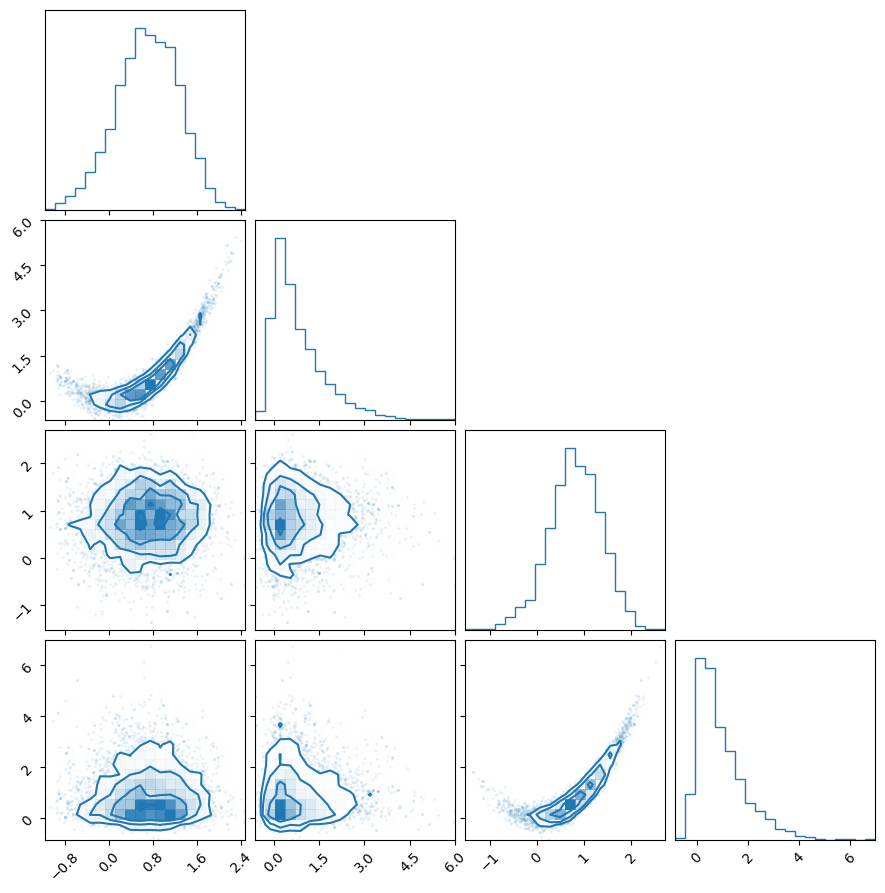

In [4]:
import matplotlib.pyplot as plt
import corner

# Get the results
samples, weights, logl, logp = sampler.posterior()

# Trace plot for the first 4 parameters
fig = corner.corner(samples[:,:4], weights=weights, color="C0")
plt.show()

### Bayesian Model Evidence or Marginal Likelihood

We can compute the model evidence and its associated uncertainty using the ``evidence()`` method.

In [5]:
# Get the evidence and its uncertainty
logz, logz_err = sampler.evidence()

print("logZ", logz, "+-", logz_err)

logZ -21.43033860019544 +- 0.026709458540766708
